# 專案目標:判斷怎樣的商品特徵會是成功的

1. 匯入數據&資料前處理
2. 定義成功"Y"
3. 視覺化出圖 <font color= yellow>目前問題: 皆為數值型態但無法desc</font>
4. 模型

## 1.匯入數據&資料前處理
- 銷售數據
- 商品資料
    - 指定欄位內容為多少時保留: column_filter
    - 把所有資料merge在一起

In [13]:
# 銷售數據
import pandas as pd

# 通常excel 黨比較不會有編碼的問題作為干擾
dataset_sales = pd.read_excel(r'./高雄駁2銷售數據112_9_113_04.xlsx' )
#print(dataset_sales)

ready_to_drop_column = ['品項']
df_sales_drop = dataset_sales.drop(columns = ready_to_drop_column)
df_sales_drop.head()

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4
0,1,3,5,6,10,1,1,1,7
1,2,1,0,2,3,7,2,0,5
2,3,2,3,3,3,3,2,2,2
3,4,46,34,20,40,0,5,42,40
4,5,4,1,1,6,4,2,6,9


In [14]:
# 商品數據
dataset_product = pd.read_excel(r'./一坨爛泥商品詳細資訊成本_利潤_商品類別.xlsx')
# drop掉商品名稱
dataset_product = dataset_product.drop(columns=['商品名稱'])
dataset_product.head()

# 指定要篩選的欄位名稱
column_to_filter = '抽成 (6/4) 1=抽，0=不抽'
# 只保留指定欄位數值為 1 的行
dataset_product_cleaned = dataset_product[dataset_product[column_to_filter] == 1]
#保留完之後 drop掉
dataset_product_cleaned = dataset_product_cleaned.drop(columns = ['抽成 (6/4) 1=抽，0=不抽'])
dataset_product_cleaned

,商品編號,商品售價,商品成本,淨利潤,商品類型,內容類型
0,1,250,66,84.0,胸章,醜萌
1,2,250,56,94.0,胸章,醜萌
2,3,250,76,74.0,胸章,醜萌
3,4,60,5,31.0,紙品,厭世
4,5,60,5,31.0,紙品,醜萌
5,6,60,6,30.0,紙品,醜萌
6,7,60,5,31.0,紙品,語錄型
7,8,60,5,31.0,紙品,語錄型
8,9,60,5,31.0,紙品,語錄型
9,10,60,5,31.0,紙品,語錄型


把商品數據 和 銷售數據做合併   
<font color=yellow>dataset_product_cleaned </font>供你比對:encoded/尚未encoded  
<font color=yellow>dataset_product_info </font>把尚未 encoded 刪掉  


In [15]:

# 商品數據_labael encoding 
from sklearn.preprocessing import LabelEncoder

# 指定需要做encoding的欄位
columns_to_encode = ['商品類型','內容類型']

Label_encoder = LabelEncoder()

for columns in columns_to_encode:
    dataset_product_cleaned[columns + '_encoded'] = Label_encoder.fit_transform(dataset_product_cleaned[columns])

dataset_product_cleaned.head()

,商品編號,商品售價,商品成本,淨利潤,商品類型,內容類型,商品類型_encoded,內容類型_encoded
0,1,250,66,84.0,胸章,醜萌,3,4
1,2,250,56,94.0,胸章,醜萌,3,4
2,3,250,76,74.0,胸章,醜萌,3,4
3,4,60,5,31.0,紙品,厭世,2,2
4,5,60,5,31.0,紙品,醜萌,2,4


In [16]:
dataset_product_info = dataset_product_cleaned.drop(columns=['商品類型','內容類型'])
dataset_product_info.head()

,商品編號,商品售價,商品成本,淨利潤,商品類型_encoded,內容類型_encoded
0,1,250,66,84.0,3,4
1,2,250,56,94.0,3,4
2,3,250,76,74.0,3,4
3,4,60,5,31.0,2,2
4,5,60,5,31.0,2,4


1. 把淨利潤提取出來: <font color= yellow>data_net_income </font>
2. 跟商品銷售數量 merge後做相乘 : <font color= yellow>merge_product_selling</font>

In [17]:
import pandas as pd
dropping_column =["商品售價","商品成本","商品類型_encoded","內容類型_encoded"]
data_net_income = dataset_product_info.drop(columns=dropping_column)
data_net_income.rename(columns={"商品編號":"編號"}, inplace=True)
data_net_income.head()


,編號,淨利潤
0,1,84.0
1,2,94.0
2,3,74.0
3,4,31.0
4,5,31.0


In [18]:
import pandas as pd
merge_product_selling = pd.merge(df_sales_drop, data_net_income, on="編號")

base_column = "淨利潤"

for column in merge_product_selling:
    if column !="編號" and column != base_column:
        merge_product_selling[column] = merge_product_selling[column] * merge_product_selling[base_column] 

merge_product_selling

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0


把銷售利潤<font color=yellow>merge_product_selling </font> +<br> 商品類型encoded 內容類別<font color=yellow>dataset_product_catagory </font>做合併=<br>  <font color=yellow>merge_product_selling </font> 

In [19]:
import pandas as pd
ready_to_drop = ["商品售價","商品成本","淨利潤"]
dataset_product_catagory = dataset_product_info.drop(columns= ready_to_drop)
dataset_product_catagory.rename(columns={"商品編號":"編號"},inplace=True)

merge_product_selling = pd.merge(merge_product_selling, dataset_product_catagory, on="編號")
merge_product_selling

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3


1. 把商品成本、商品售價 取出  <font color= yellow>dataset_product_cleaned</font>
2. 和銷售數據 <font color= yellow>merge_product_selling</font> merge: <font color= yellow>merge_all </font>目前的大表

In [20]:
dataset_product_cleaned.rename(columns={"商品編號":"編號"},inplace=True)
drop_columns_for_info= ["淨利潤","商品類型","內容類型","商品類型_encoded","內容類型_encoded"]
dataset_product_cleaned = dataset_product_cleaned.drop(columns=drop_columns_for_info)
merge_all = pd.merge(merge_product_selling, dataset_product_cleaned, on="編號")
merge_all


,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4,250,66
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4,250,56
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4,250,76
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2,60,5
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4,60,5
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4,60,6
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3,60,5
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3,60,5
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3,60,5
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3,60,5


## 2. 定義成功Y 
### 製造欄位 評估Y(分類)之指標["平均月銷售(淨利潤)"] 
把銷售利潤變為單獨欄位 有利潤的的加總/有利潤的count=平均單月營收  
平均月營收/ 平均月營收總和 *100 : 銷售佔比  
2-1. 平均月銷售  
2-2. 平均月銷售總和  
2-3. 平均月銷售佔比  
2-4. 定義成功Y之平均月銷售

In [21]:
# 計算銷售總額，考慮所有指定月份
merge_all["銷售總額"] = merge_all[["112/9","112/10","112/11","112/12","113/1","113/2","113/3","113/4"]].apply(
    lambda row: row[row != 0].sum(), axis=1
)
# 計算銷售不為0的月份數量
merge_all["計算銷售不為0的月份數量"] = merge_all[["112/9","112/10","112/11","112/12","113/1","113/2","113/3","113/4"]].apply(
    lambda row: (row != 0).sum(), axis=1
)
merge_all

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本,銷售總額,計算銷售不為0的月份數量
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4,250,66,2856.0,8
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4,250,56,1880.0,6
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4,250,76,1480.0,8
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2,60,5,7037.0,7
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4,60,5,1023.0,8
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4,60,6,780.0,7
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3,60,5,248.0,4
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3,60,5,186.0,3
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3,60,5,341.0,7
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3,60,5,341.0,6


### 2-1.平均月銷售

In [22]:
merge_all["平均月銷售"] = merge_all.apply(lambda row: row["銷售總額"]/ row["計算銷售不為0的月份數量"],axis=1).astype(int)
merge_all

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本,銷售總額,計算銷售不為0的月份數量,平均月銷售
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4,250,66,2856.0,8,357
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4,250,56,1880.0,6,313
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4,250,76,1480.0,8,185
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2,60,5,7037.0,7,1005
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4,60,5,1023.0,8,127
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4,60,6,780.0,7,111
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3,60,5,248.0,4,62
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3,60,5,186.0,3,62
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3,60,5,341.0,7,48
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3,60,5,341.0,6,56


### 2-2.平均月銷售總合

In [31]:

merge_all["所有產品之銷售"] =  merge_all[["平均月銷售"]].sum().sum()
merge_all["銷售佔比"] = merge_all.apply(lambda row: row["平均月銷售"] / row["所有產品之銷售"], axis=1)
merge_all

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本,銷售總額,計算銷售不為0的月份數量,平均月銷售,所有產品之銷售,銷售佔比
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4,250,66,2856.0,8,357,6715,0.053165
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4,250,56,1880.0,6,313,6715,0.046612
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4,250,76,1480.0,8,185,6715,0.027550
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2,60,5,7037.0,7,1005,6715,0.149665
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4,60,5,1023.0,8,127,6715,0.018913
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4,60,6,780.0,7,111,6715,0.016530
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3,60,5,248.0,4,62,6715,0.009233
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3,60,5,186.0,3,62,6715,0.009233
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3,60,5,341.0,7,48,6715,0.007148
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3,60,5,341.0,6,56,6715,0.008340


### 2-3.平均月銷售佔比

In [32]:
merge_all["銷售佔比"] = ((merge_all["平均月銷售"] / merge_all["所有產品之銷售"])*100).round(2)
merge_all

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本,銷售總額,計算銷售不為0的月份數量,平均月銷售,所有產品之銷售,銷售佔比
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4,250,66,2856.0,8,357,6715,5.32
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4,250,56,1880.0,6,313,6715,4.66
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4,250,76,1480.0,8,185,6715,2.76
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2,60,5,7037.0,7,1005,6715,14.97
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4,60,5,1023.0,8,127,6715,1.89
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4,60,6,780.0,7,111,6715,1.65
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3,60,5,248.0,4,62,6715,0.92
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3,60,5,186.0,3,62,6715,0.92
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3,60,5,341.0,7,48,6715,0.71
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3,60,5,341.0,6,56,6715,0.83


### 2-4.定義成功分類"Y"
當平諄銷售佔比 為多少時 為第幾分類

In [33]:

# 定義分類函數
def categorize_value(x):
    if x < 1:
        return 0
    elif x < 5:
        return 1
    elif x < 10:
        return 3
    else:
        return 4

merge_all["y"] = merge_all[["銷售佔比"]].map(categorize_value)

merge_all

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本,銷售總額,計算銷售不為0的月份數量,平均月銷售,所有產品之銷售,銷售佔比,y
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4,250,66,2856.0,8,357,6715,5.32,3
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4,250,56,1880.0,6,313,6715,4.66,1
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4,250,76,1480.0,8,185,6715,2.76,1
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2,60,5,7037.0,7,1005,6715,14.97,4
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4,60,5,1023.0,8,127,6715,1.89,1
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4,60,6,780.0,7,111,6715,1.65,1
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3,60,5,248.0,4,62,6715,0.92,0
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3,60,5,186.0,3,62,6715,0.92,0
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3,60,5,341.0,7,48,6715,0.71,0
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3,60,5,341.0,6,56,6715,0.83,0


In [ ]:
merge_all.columns

Index(['編號', '112/9', '112/10', '112/11', '112/12', '113/1', '113/2', '113/3',
       '113/4', '淨利潤', '商品類型_encoded', '內容類型_encoded', '商品售價', '商品成本', '銷售總額',
       '計算銷售不為0的月份數量', '平均月銷售', '所有產品之銷售', '銷售佔比', 'y'],
      dtype='object')

## 3.視覺化出圖
<font size=5rem color= red>記得要之照 數值排列的話 單位要是數值型</font>

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
# 以國家去做輸入之變數的低到高排列
def des_df(var):
    des_df = merge_all[['編號',var]].sort_values(var, ascending = False)
    return des_df

# 以上面的基礎 變2維去出圖
def des_plot(var, ylab):
    plt.figure(figsize = (30,5))    
    ax = sns.barplot(x='編號', y=var, data= des_df(var))
    ax.set(xlabel = '', ylabel= ylab)
    plt.xticks(rotation=90)
    return plt.show()    

In [42]:
des_df("平均月銷售").head(5)

,編號,平均月銷售
18,19,1233
3,4,1005
12,13,617
27,28,487
0,1,357


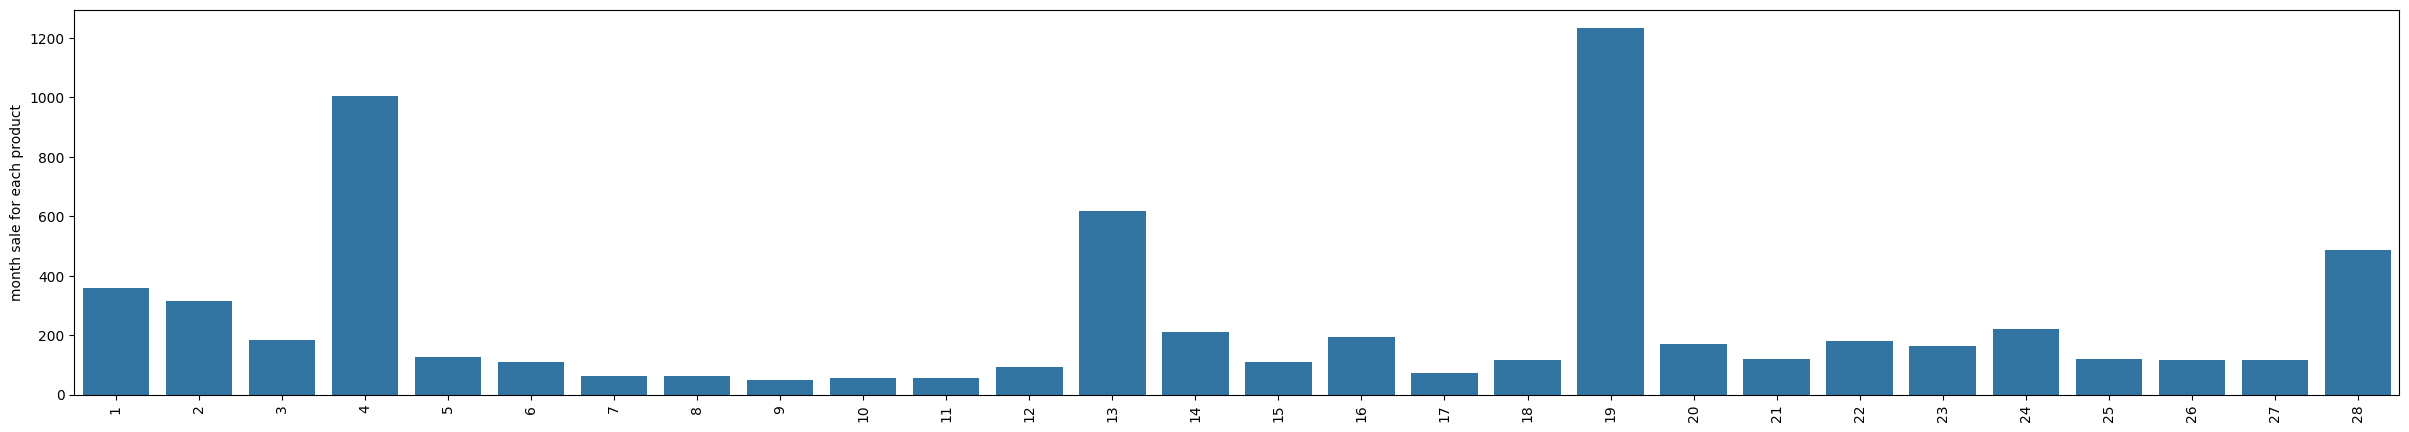

In [40]:
des_plot("平均月銷售", "month sale for each product")

In [55]:
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   編號            28 non-null     float64
 1   112/9         28 non-null     float64
 2   112/10        28 non-null     float64
 3   112/11        28 non-null     float64
 4   112/12        28 non-null     float64
 5   113/1         28 non-null     float64
 6   113/2         28 non-null     float64
 7   113/3         28 non-null     float64
 8   113/4         28 non-null     float64
 9   淨利潤           28 non-null     float64
 10  商品類型_encoded  28 non-null     int32  
 11  內容類型_encoded  28 non-null     int32  
 12  商品售價          28 non-null     float64
 13  商品成本          28 non-null     float64
 14  銷售總額          28 non-null     float64
 15  計算銷售不為0的月份數量  28 non-null     int64  
 16  平均月銷售         28 non-null     float64
 17  所有產品之銷售       28 non-null     int64  
 18  銷售佔比          28 non-null     fl

In [54]:
merge_all['平均月銷售'] = merge_all['平均月銷售'].astype(float)
merge_all['商品售價'] = merge_all['商品售價'].astype(float)
merge_all['商品成本'] = merge_all['商品成本'].astype(float)
merge_all['y'] = merge_all['y'].astype(float)
merge_all['編號'] = merge_all['編號'].astype(float)

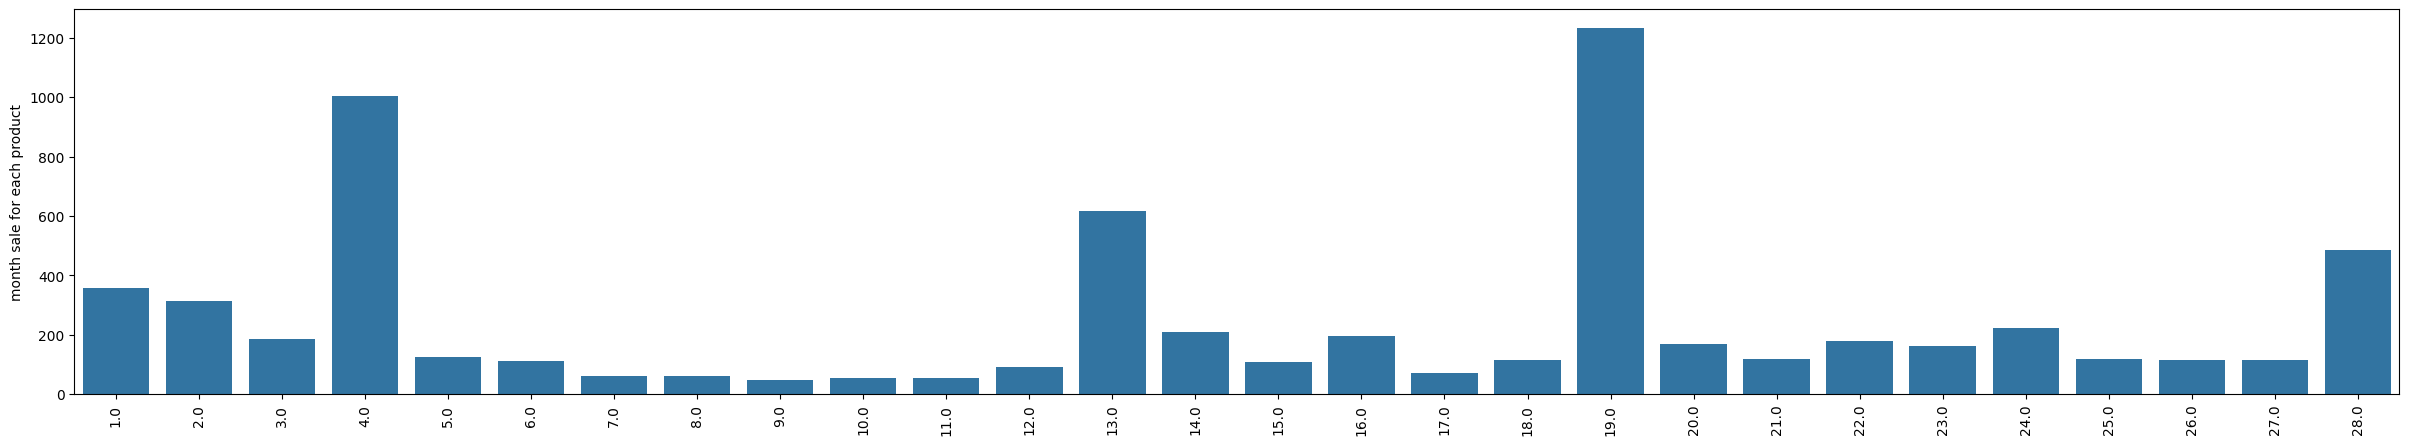

In [56]:
des_plot("平均月銷售", "month sale for each product")

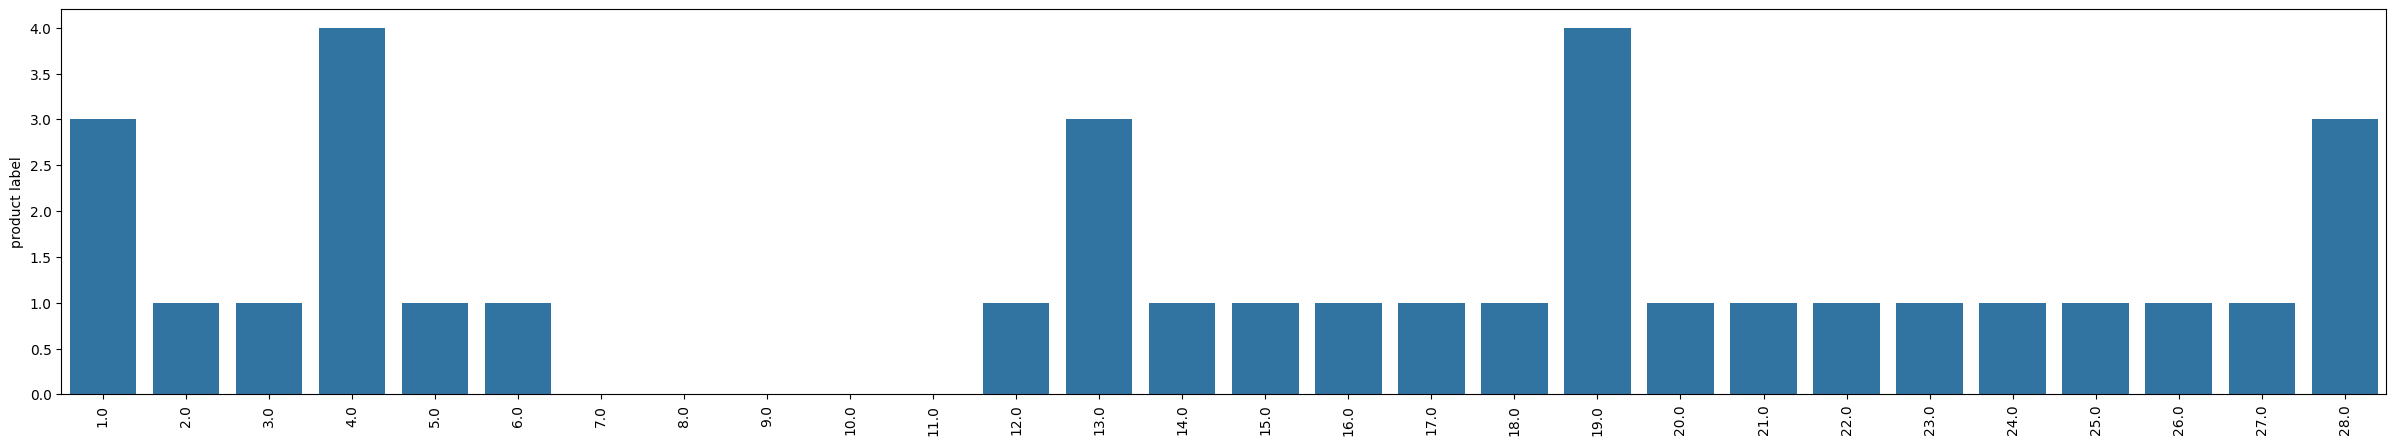

In [57]:
des_plot("y", "product label")